# Clustering 예시

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

https://drive.google.com/file/d/1sRRpG1LkEJJpTmNiCHmcL12LR5xnLg69/view?usp=sharing  
1. 링크로 들어가서 데이터 다운로드
2. 코랩 왼쪽 바에 파일 폴더 선택
3. sample data 폴더 우클릭 -> 업로드 선택
4. 다운로드 받은 데이터 업로드

## 쇼핑몰 고객 분석 데이터셋


**Data Set Characteristics:**  

    :Number of Instances: 200

    :Number of Attributes: 5

    :Attribute Information (in order):
        - Custormer ID
        - Gender
        - Age    
        - Annual Income
        - Spending Score(1-100)

    :Missing Attribute Values: None

In [3]:
dataframe = pd.read_csv('sample_data/Mall_Customers.csv')

In [4]:
dataframe.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


## K-means clustering

In [ ]:
# Annual Income, Spending Score 컬럼만 사용
X_data = dataframe[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
from sklearn.cluster import KMeans

k = 3

model = KMeans(n_clusters = k, random_state = 10)
model.fit(X_data)

df1 = dataframe.copy()

In [ ]:
df1['cluster'] = model.fit_predict(X_data)

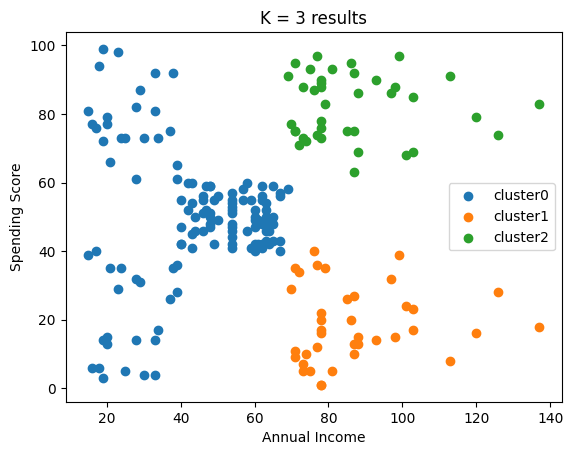

In [ ]:
# 시각화
import matplotlib.pyplot as plt

for i in range(k) :
  plt.scatter(df1.loc[df1['cluster'] == i, 'Annual Income (k$)'],
              df1.loc[df1['cluster'] == i, 'Spending Score (1-100)'],
              label = 'cluster'+str(i))
plt.legend()
plt.title(f'K = {str(k)} results')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### K 갯수를 바꾸고 학습 진행

In [ ]:
distortions = []

for i in range(1, 11) :
  km = KMeans(n_clusters=i,
              random_state=10)
  km.fit(X_data)
  distortions.append(km.inertia_)

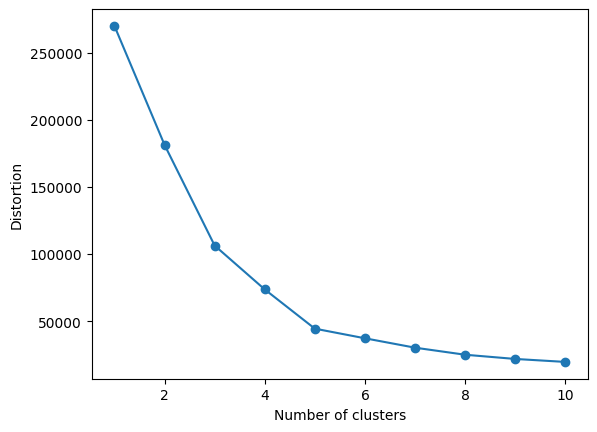

In [ ]:
import matplotlib.pyplot as plt

# 5가 elbow point처럼 보임
plt.plot(range(1,11), distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
from sklearn.cluster import KMeans


k = 5

model = KMeans(n_clusters = k, random_state = 10)
model.fit(X_data)

df2 = dataframe.copy()

In [ ]:
df2['cluster'] = model.fit_predict(X_data)

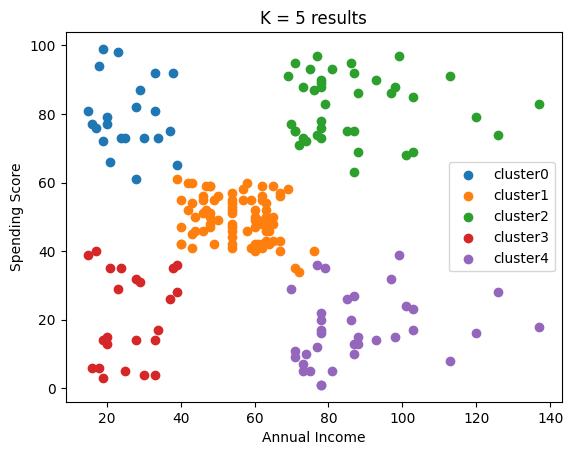

In [ ]:
# 시각화
import matplotlib.pyplot as plt

for i in range(k) :
  plt.scatter(df2.loc[df2['cluster'] == i, 'Annual Income (k$)'],
              df2.loc[df2['cluster'] == i, 'Spending Score (1-100)'],
              label = 'cluster'+str(i))
plt.legend()
plt.title(f'K = {str(k)} results')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Scaling 처리 후 학습 진행

In [ ]:
from sklearn.preprocessing import StandardScaler

# Annual Income, Spending Score 컬럼만 사용
X_data = dataframe[['Annual Income (k$)', 'Spending Score (1-100)']]

standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X_data)

In [ ]:
from sklearn.cluster import KMeans

k = 5

model = KMeans(n_clusters = k, random_state = 10)
model.fit(X_scaled)

df3 = dataframe.copy()

In [ ]:
df3['cluster'] = model.fit_predict(X_scaled)

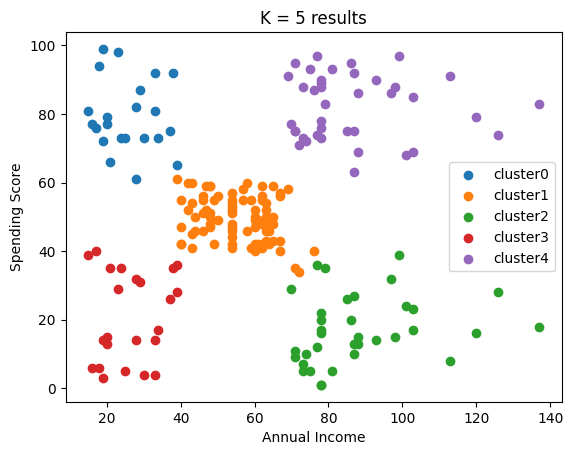

In [ ]:
# 시각화
import matplotlib.pyplot as plt

for i in range(k) :
  plt.scatter(df3.loc[df3['cluster'] == i, 'Annual Income (k$)'],
              df3.loc[df3['cluster'] == i, 'Spending Score (1-100)'],
              label = 'cluster'+str(i))
plt.legend()
plt.title(f'K = {str(k)} results')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## 실습문제

In [6]:
from sklearn.cluster import KMeans

X_data = dataframe[['Age', 'Spending Score (1-100)']]

distortions = []

for i in range(1, 11) :
  km = KMeans(n_clusters=i,
              random_state=10)
  km.fit(X_data)
  distortions.append(km.inertia_)

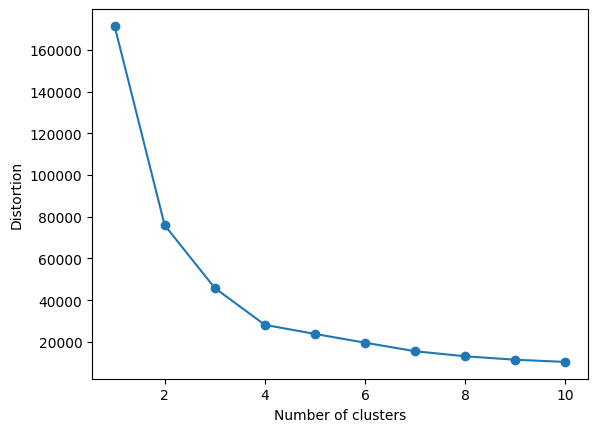

In [7]:
import matplotlib.pyplot as plt


plt.plot(range(1,11), distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [8]:
k = 4

model = KMeans(n_clusters = k, random_state = 10)
model.fit(X_data)

df1 = dataframe.copy()

In [9]:
df1['cluster'] = model.fit_predict(X_data)

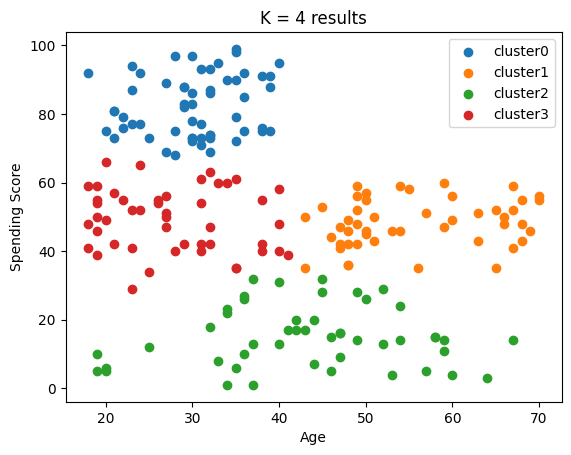

In [11]:
# 시각화
import matplotlib.pyplot as plt

for i in range(k) :
  plt.scatter(df1.loc[df1['cluster'] == i, 'Age'],
              df1.loc[df1['cluster'] == i, 'Spending Score (1-100)'],
              label = 'cluster'+str(i))
plt.legend()
plt.title(f'K = {str(k)} results')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()